# Распознавание птиц

Ссылка на гитхаб: [https://github.com/LassieLassie/project_bird_public](https://github.com/LassieLassie/project_bird_public)

Телеграм - бот **@what_the_bird_bot** (работает на Heroku)

In [0]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler

import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os

from fastai.vision import *

plt.ion()

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Классификатор распознает следующих птиц:

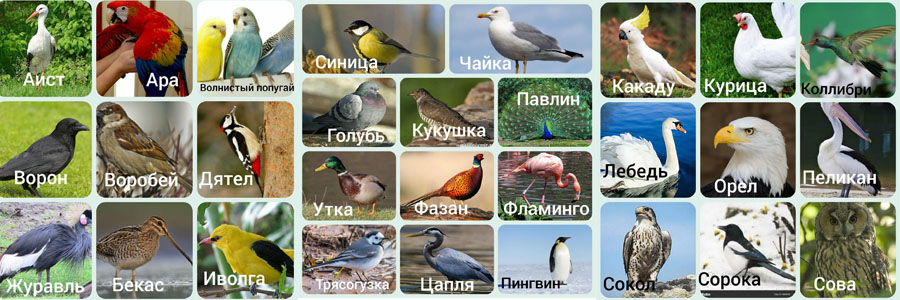

In [3]:
from IPython.display import Image, display
brd = '/content/drive/My Drive/PROJECT_BIRD/birds_train_val/brds.jpg'
display(Image(brd))

Импортируем данные - они сразу разделены на train и validation

In [0]:
from pathlib import Path
#PATH = Path('../birds_train_val')
data = ImageDataBunch.from_folder('/content/drive/My Drive/PROJECT_BIRD/birds_train_val/', train = 'train', valid = 'valid', ds_tfms=get_transforms(), bs=16, size=224)

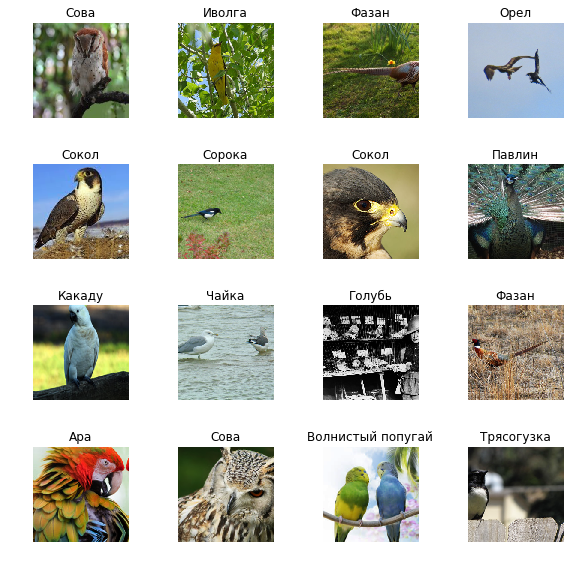

In [5]:
data.show_batch(rows=4, figsize=(8,8))

In [14]:
# так как используем transfer learning, нормализуем данные по стандартам imagenet
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (30943 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Бекас,Бекас,Бекас,Бекас,Бекас
Path: /content/drive/My Drive/PROJECT_BIRD/birds_train_val;

Valid: LabelList (6543 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Коллибри,Коллибри,Коллибри,Коллибри,Коллибри
Path: /content/drive/My Drive/PROJECT_BIRD/birds_train_val;

Test: None

In [0]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [7]:
# смотрим классы
print(data.classes)
len(data.classes),data.c

['Аист', 'Ара', 'Бекас', 'Волнистый попугай', 'Воробей', 'Ворон', 'Голубь', 'Дятел', 'Журавль', 'Иволга', 'Какаду', 'Коллибри', 'Кукушка', 'Курица', 'Лебедь', 'Орел', 'Павлин', 'Пеликан', 'Пингвин', 'Синица', 'Сова', 'Сокол', 'Сорока', 'Трясогузка', 'Утка', 'Фазан', 'Фламинго', 'Цапля', 'Чайка']


(29, 29)

In [0]:
model = cnn_learner(data, models.vgg16_bn, metrics=accuracy)

In [17]:
# точность 94-95%
model.fit_one_cycle(10, 0.001)

epoch,train_loss,valid_loss,accuracy,time
0,0.255212,0.182778,0.944827,12:09


Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, b

KeyboardInterrupt: ignored

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


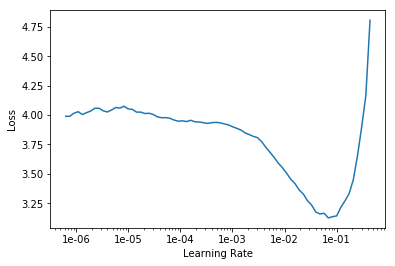

In [0]:
# подбираем learning rate
model.lr_find()
model.recorder.plot()

In [0]:
# сохраним модель
model.export()

In [0]:
interp = ClassificationInterpretation.from_learner(model)

Так как картинки автоматически скачаны из интернета в них присутствует процент мусора, и иногда сеть определяет правильно тех птиц,  которые лежат в неправильной папке

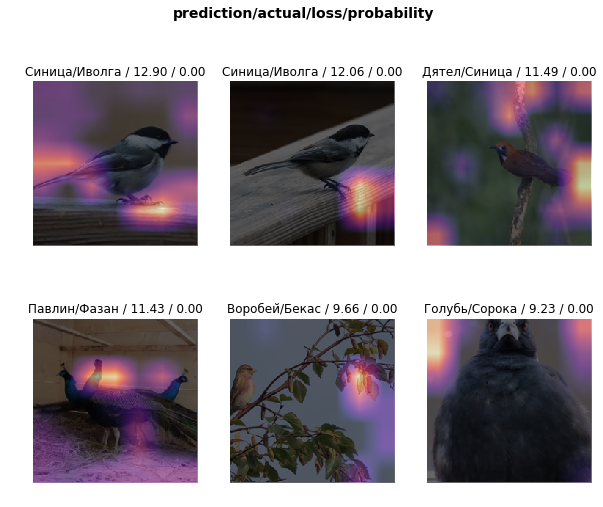

In [21]:
interp.plot_top_losses(6, figsize=(10,8))

Cеть безошибочно определяет лебедей, куриц, какаду и чаек,  больше всего путает похожих птиц - аиста с  журавлем и орла с соколом

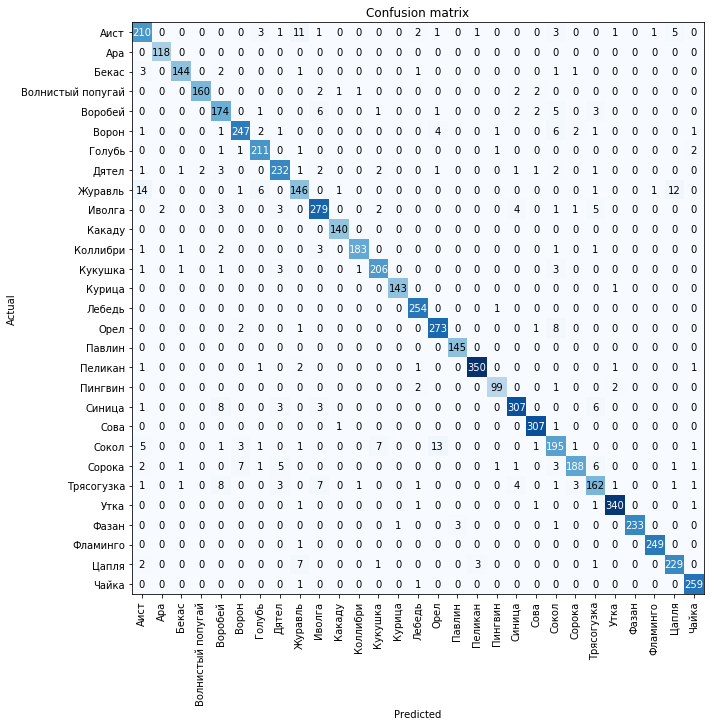

In [22]:
interp.plot_confusion_matrix(figsize=(10,10))